DC Propagation block
====================

This example provides an example of action potential propagation block using a DC stimulation. This is perfectly working in silico, but can be unsafe in vivo as long DC values are unbalanced and can damage tissues surrounding the electrode

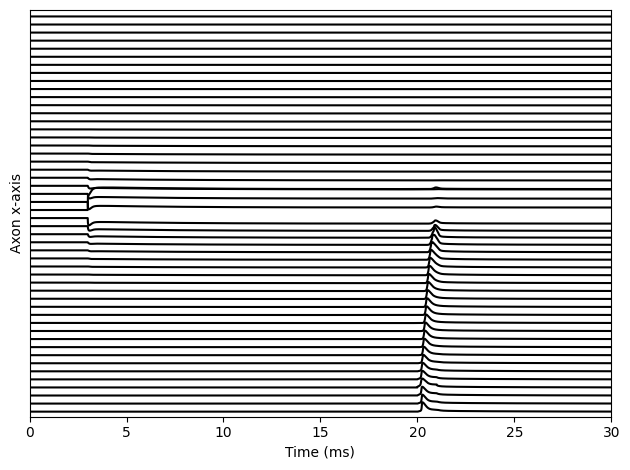

In [3]:
import nrv
import numpy as np
import matplotlib.pyplot as plt


model = 'MRG'
diam = 10
y = 0
z = 0
n_node = 50


t_sim = 50
t_position=0.05
t_start=20
t_duration=1
t_amplitude=1

b_start = 3
b_duration = t_sim
block_amp = 100
nseg = 3
material = nrv.load_material('endoneurium_bhadra')


L=nrv.get_length_from_nodes(diam,n_node)

axon = nrv.myelinated(y,z,diam,L,rec='nodes',dt=0.005,Nseg_per_sec=nseg,model=model) 

y_elec = 100
z_elec = 0
x_elec = axon.x_nodes[np.int32(n_node/2)]	# electrode y position, in [um]
E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

# insert test spike
axon.insert_I_Clamp(t_position, t_start, t_duration, t_amplitude)
# extra-cellular stimulation
stim_1 = nrv.stimulus()
stim_1.biphasic_pulse(b_start, block_amp, b_duration, 0, 0,anod_first=False)

stim_extra = nrv.stimulation(material)
stim_extra.add_electrode(E1,stim_1)
axon.attach_extracellular_stimulation(stim_extra)

# simulate axon activity
results = axon.simulate(t_sim=t_sim)#,footprints = footprints)
results.rasterize()

fig, axs = plt.subplots(2)
results.plot_x_t(axs[0],'V_mem')
axs[0].set_ylabel("Axon x-axis (µm)")
axs[0].set_xlabel("Time (ms)")
axs[0].set_xlim(0,30)
axs[0].set_ylim(0,np.max(results.x_rec))

results.raster_plot(axs[1],'V_mem')
axs[1].set_ylabel("Axon x-axis (µm)")
axs[1].set_xlabel("Time (ms)")
axs[1].set_xlim(0,30)
axs[1].set_ylim(0,np.max(results.x_rec))

fig.tight_layout()
#plt.show()